In [1]:
# Trabalho 1 - Geração de imagens
# SCC0251 - Image Processing (01/2021)
# Fabiana Dalacqua - 
# Pedro Henrique Nieuwenhoff - 10377729
import numpy as np
import numpy.random
import imageio
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [32]:
r = str(input()) # nome do arquivo contendo a imagem de referência
C = int(input()) # tamanho lateral da imagem sintetizada C(assuma que a imagem é quadrada e que seu tamanho é CxC)
F = int(input()) # a função F que será usada para geração
Q = int(input()) # o parâmetro Q, usado para geração de imagens
N = int(input()) # o tamanho lateralNda imagem amostrada, onde N<=C
B = int(input()) # número de bits por pixel B, com 1<=B<=8
S = int(input()) # seed S para ser usado com as funções aleatórias

ex3.npy
512
3
1001
256
3
1


In [33]:
# definindo a seed das funções aleatórias
np.random.seed(S)

In [34]:
# definição das funções geradoras das imagens
def function_1(x,y):
    return (x*y + 2*y)

def function_2(x,y):
    return abs(np.cos(x/Q) + 2*np.sin(y/Q))

def function_3(x,y):
    return abs(3*(x/Q) - np.cbrt(y/Q))
    
def function_4():
    return np.random.rand()

def function_5(x,y):
    return 1

In [35]:
r_array = np.load(r) # carrega a imagem de referência
img_sint = np.zeros((C,C), float) # imagem sintetizada inicial

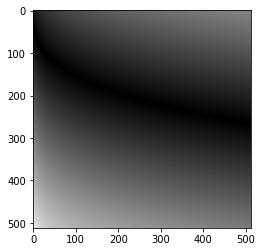

In [36]:
if F == 1:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_1(x,y)
elif F == 2:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_2(x,y)
elif F == 3:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_3(x,y)
elif F == 4:
    for x in range(C):
        for y in range(C):
            img_sint[x,y] = function_4()
#else:

plt.imshow(img_sint, cmap="gray")
    
